In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [1]:
import os
import pandas as pd


dataset_path = "."
dataset_summary = {}

for split in ['train', 'test', 'val']:
    split_path = os.path.join(dataset_path, split)
    if not os.path.exists(split_path):
        print(f"Folder '{split}' not found inside '{dataset_path}'")
        continue

    split_summary = {}
    total_images = 0
    for disease in os.listdir(split_path):
        disease_path = os.path.join(split_path, disease)
        if os.path.isdir(disease_path):
            count = len(os.listdir(disease_path))
            split_summary[disease] = count
            total_images += count

    split_summary['Total'] = total_images
    dataset_summary[split] = split_summary


df = pd.DataFrame(dataset_summary).fillna(0).astype(int)

print("\n DATASET SUMMARY (HUMAN EYE PREDICTION SYSTEM)")
print(df)



 DATASET SUMMARY (HUMAN EYE PREDICTION SYSTEM)
        train   test    val
CNV     26218   3746   7491
DME      8118   1161   2319
DRUSEN   6206    887   1773
NORMAL  35973   5139  10278
Total   76515  10933  21861


In [ ]:
import pickle

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

Data preparation

In [4]:
training_set = image_dataset_from_directory(
    "./train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [5]:
validation_set = image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [6]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [7]:
INPUT_SHAPE = (224, 224, 3)

In [8]:
mobnet=tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE ,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
   
) 

In [9]:

model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [11]:

model.add(mobnet)

In [12]:
model.add(tf.keras.layers.Dense(units = 4,activation='softmax'))

In [13]:
metrics_list = ['accuracy']

In [14]:
 model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics_list)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [16]:

training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
4783/4783 [==============================] - 544s 111ms/step - loss: 1.0172 - accuracy: 0.8814 - val_loss: 0.7806 - val_accuracy: 0.9002
Epoch 2/15
4783/4783 [==============================] - 546s 114ms/step - loss: 0.6505 - accuracy: 0.8956 - val_loss: 0.5370 - val_accuracy: 0.8730
Epoch 3/15
4783/4783 [==============================] - 547s 114ms/step - loss: 0.4329 - accuracy: 0.9064 - val_loss: 0.3571 - val_accuracy: 0.9485
Epoch 4/15
4783/4783 [==============================] - 545s 114ms/step - loss: 0.2931 - accuracy: 0.9598 - val_loss: 0.2405 - val_accuracy: 0.9652
Epoch 5/15
4783/4783 [==============================] - 527s 110ms/step - loss: 0.2067 - accuracy: 0.9675 - val_loss: 0.1991 - val_accuracy: 0.9613
Epoch 6/15
4783/4783 [==============================] - 526s 110ms/step - loss: 0.1544 - accuracy: 0.9723 - val_loss: 0.1556 - val_accuracy: 0.9629
Epoch 7/15
4783/4783 [==============================] - 524s 110ms/step - loss: 0.1196 - accuracy: 0.9774 - val_

In [17]:
model.save("Trained_Model.h5")

In [18]:
model.save("Trained_Model.keras")

In [22]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [4]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'loss': [1.0172233581542969,
  0.6504883170127869,
  0.4328874945640564,
  0.2931217849254608,
  0.2066829949617386,
  0.1544264256954193,
  0.11963474750518799,
  0.09620637446641922,
  0.08231866359710693,
  0.06985615938901901,
  0.06134870648384094,
  0.055202774703502655,
  0.05099096521735191,
  0.04463573917746544,
  0.04395145922899246],
 'accuracy': [0.8813958168029785,
  0.8956413865089417,
  0.9063974618911743,
  0.959811806678772,
  0.9674573540687561,
  0.972332239151001,
  0.9774292707443237,
  0.9813631176948547,
  0.9835326671600342,
  0.9861334562301636,
  0.9876495003700256,
  0.988838791847229,
  0.9892961978912354,
  0.9904332756996155,
  0.9905247092247009],
 'val_loss': [0.7806205749511719,
  0.536960780620575,
  0.35707423090934753,
  0.2404712289571762,
  0.1990656554698944,
  0.15563729405403137,
  0.12336070090532303,
  0.125707745552063,
  0.11681763082742691,
  0.10301625728607178,
  0.11908630281686783,
  0.11200931668281555,
  0.11334947496652603,
  0.104

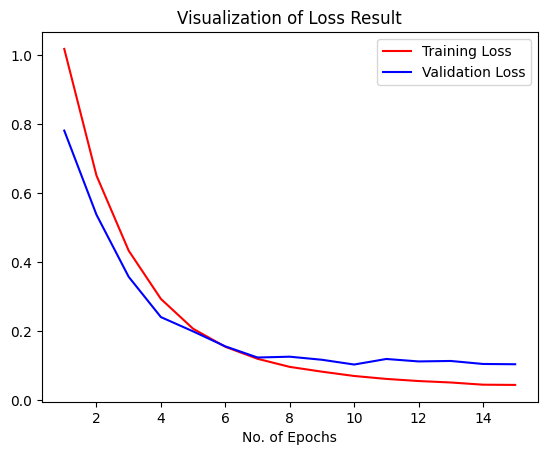

In [6]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()


## Model evaulation

In [7]:
model = tf.keras.models.load_model("Trained_Model.h5")

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [9]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [11]:
test_loss, test_acc = model.evaluate(test_set)

342/342 [==============================] - 21s 61ms/step - loss: 0.1150 - accuracy: 0.9693


In [14]:
test_loss, test_acc

(0.11497684568166733, 0.9692673683166504)

In [15]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [16]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [17]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [18]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

342/342 [==============================] - 22s 59ms/step


In [19]:
predicted_categories

array([[9.9270719e-01, 2.1440887e-03, 3.9876150e-03, 1.1611695e-03],
       [9.9186605e-01, 2.2863771e-03, 4.5744232e-03, 1.2730669e-03],
       [9.9270719e-01, 2.1440887e-03, 3.9876150e-03, 1.1611695e-03],
       ...,
       [5.7398860e-04, 1.6207910e-03, 2.7179497e-03, 9.9508733e-01],
       [5.7398860e-04, 1.6207910e-03, 2.7179497e-03, 9.9508733e-01],
       [5.7398860e-04, 1.6207910e-03, 2.7179497e-03, 9.9508733e-01]],
      dtype=float32)

In [20]:
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

### 1. Classification Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3746
           1       0.96      0.96      0.96      1161
           2       0.84      0.91      0.88       887
           3       0.99      0.99      0.99      5139

    accuracy                           0.97     10933
   macro avg       0.94      0.95      0.95     10933
weighted avg       0.97      0.97      0.97     10933



### 2. Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3604,   26,  110,    6],
       [  15, 1110,    2,   34],
       [  38,    6,  810,   33],
       [   7,   20,   39, 5073]], dtype=int64)

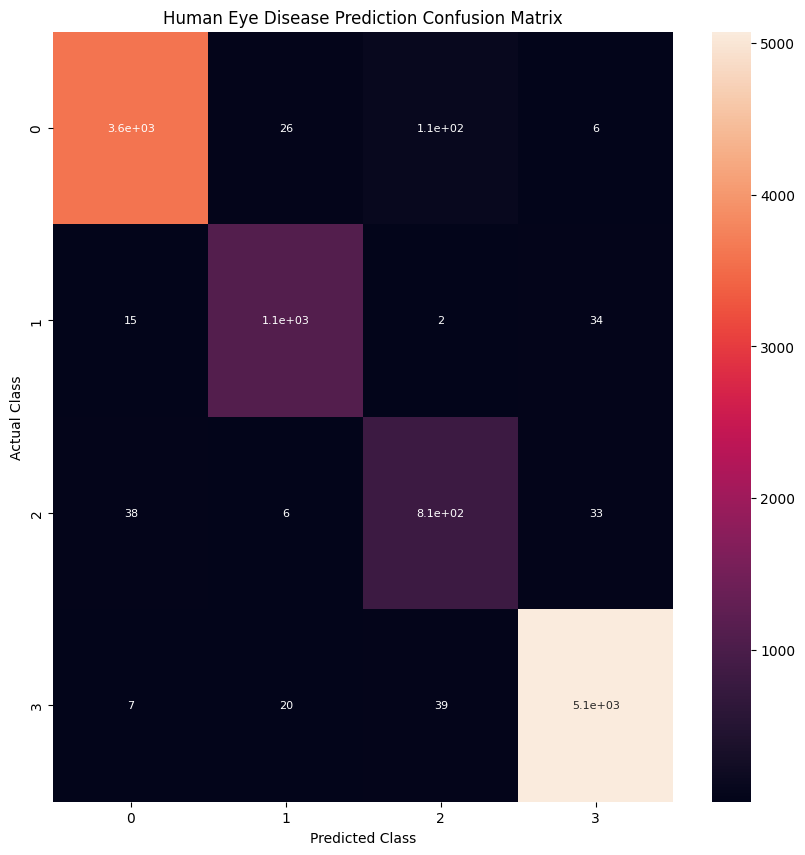

In [25]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()